<a href="https://colab.research.google.com/github/ssilb4/colab/blob/jeju/jeju_datalab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ssilb4/gitflow/master/data/output_datalab3.csv?token=AEXPY5B5XNUENTQARQRPQNS7CUPAE')

In [4]:
df['위치'].unique()

array(['서울특별시', '경기도', '부산광역시', '경상남도', '인천광역시', '대구광역시', '경상북도', '강원도',
       '충청남도', '전라남도', '대전광역시', '울산광역시', '충청북도', '전라북도', '제주특별자치도',
       '광주광역시'], dtype=object)

In [8]:
import matplotlib.pyplot as plt

df_seoul = df[df['위치']=='서울특별시']
df_seoul.index = pd.to_datetime(df_seoul["날짜"],format="%Y%m%d")


In [9]:
import numpy as np

In [10]:
work_types=['eatery','fbeauty','hobbyenter','leisure','living','tour']

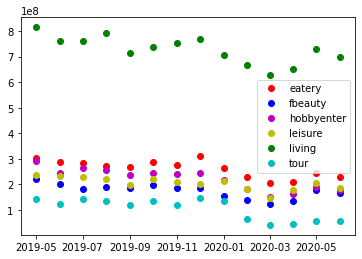

In [11]:
index = 0
colors = ['ro','bo','mo','yo','go','co']
for work_type in df['업종'].drop_duplicates():
  df_seoul = df[(df['위치']=='서울특별시') & (df['업종']==work_type)]
  df_seoul.index = pd.to_datetime(df_seoul["날짜"],format="%Y%m%d")
  plt.plot(df_seoul.index,df_seoul['매출'],colors[index], label=work_types[index])
  index += 1
  #plt.ylabel('some numbers')
plt.legend()
plt.show()

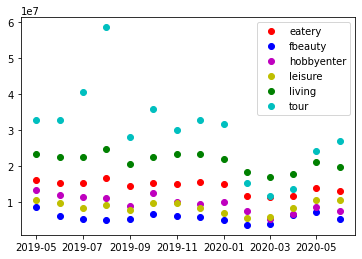

In [40]:
index = 0
colors = ['ro','bo','mo','yo','go','co']
for work_type in df['업종'].drop_duplicates():
  df_jeju = df[(df['위치']=='제주특별자치도') & (df['업종']==work_type)]
  df_jeju.index = pd.to_datetime(df_jeju["날짜"],format="%Y%m%d")
  plt.plot(df_jeju.index,df_jeju['매출'],colors[index], label=work_type)
  index += 1
  #plt.ylabel('some numbers')
plt.legend()
plt.show()

In [45]:
df_group = df.groupby(['위치','날짜'],as_index=False).agg({
    '매출':sum})

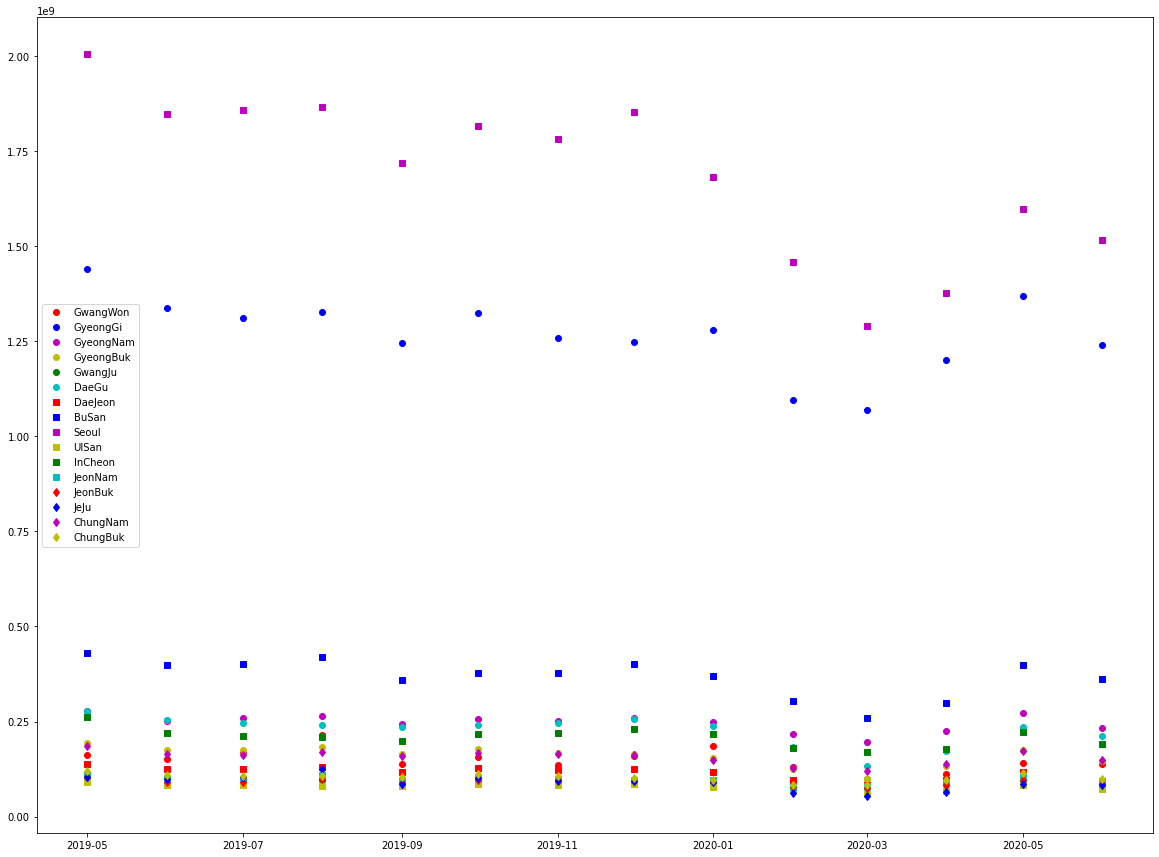

In [69]:
index = 0
locations=['GwangWon', 'GyeongGi', 'GyeongNam', 'GyeongBuk', 'GwangJu', 'DaeGu', 'DaeJeon', 'BuSan','Seoul', 'UlSan', 'InCheon', 'JeonNam', 'JeonBuk', 'JeJu','ChungNam', 'ChungBuk']
colors = ['ro','bo','mo','yo','go','co',     'rs','bs','ms','ys','gs','cs',    'rd','bd','md','yd','gd','cd']
plt.figure(figsize=(20,15))
for location in df_group['위치'].drop_duplicates():
  df_gorup2 = df_group[df_group['위치']==location]
  df_gorup2.index = pd.to_datetime(df_gorup2["날짜"],format="%Y%m%d")
  plt.plot(df_gorup2.index,df_gorup2['매출'], colors[index], label=locations[index])
  index += 1
  #break
  #plt.ylabel('some numbers')
plt.legend()
plt.show()

In [47]:
df_group

,위치,날짜,매출
날짜,,,
2019-05-01,강원도,20190501,161927748
2019-06-01,강원도,20190601,151123928
2019-07-01,강원도,20190701,169376521
2019-08-01,강원도,20190801,215660537
2019-09-01,강원도,20190901,138718796
...,...,...,...
2020-02-01,충청북도,20200201,82016676
2020-03-01,충청북도,20200301,82122100
2020-04-01,충청북도,20200401,95334733
